In [2]:
import warnings
warnings.filterwarnings('ignore')



In [5]:
import pandas_datareader as pdr

In [4]:
import datetime

In [13]:
aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2019, 1, 1), 
                          end=datetime.datetime(2019, 4, 8))

In [27]:
aapl.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-26,192.880005,184.580002,191.660004,186.789993,49800500.0,186.789993
2019-03-27,189.759995,186.550003,188.750000,188.470001,29848400.0,188.470001
2019-03-28,189.559998,187.529999,188.949997,188.720001,20780400.0,188.720001
2019-03-29,190.080002,188.539993,189.830002,189.949997,23564000.0,189.949997
2019-04-01,191.679993,188.380005,191.639999,191.240005,27862000.0,191.240005
2019-04-02,194.460007,191.050003,191.089996,194.020004,22765700.0,194.020004
2019-04-03,196.500000,193.149994,193.250000,195.350006,23271800.0,195.350006
2019-04-04,196.369995,193.139999,194.789993,195.690002,19114300.0,195.690002
2019-04-05,197.100006,195.929993,196.449997,197.000000,18526600.0,197.000000


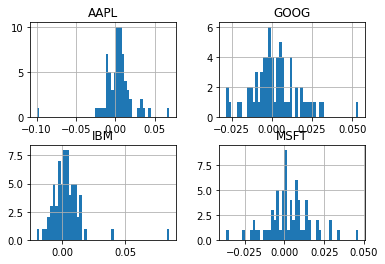

Ticker       AAPL       GOOG        IBM       MSFT
count   67.000000  67.000000  67.000000  67.000000
mean     0.003818   0.002352   0.003734   0.002642
std      0.019818   0.014502   0.013535   0.013892
min     -0.099607  -0.028484  -0.019964  -0.036788
25%     -0.004897  -0.005748  -0.002709  -0.004884
50%      0.004044   0.000101   0.002094   0.001370
75%      0.010814   0.009075   0.007937   0.009145
max      0.068335   0.053786   0.084639   0.046509


In [29]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot the distribution of `daily_pct_c`
daily_pct_change.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_change.describe())

In [ ]:
# Import data from excelsheet of csv file using dataframe

import pandas as pd
aapl.to_csv('data/aapl_ohlc.csv')
df = pd.read_csv('data/aapl_ohlc.csv', header=0, index_col='Date', parse_dates=True)

In [18]:
# For more than one ticker price
import pandas as pd
def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2019, 1, 1), datetime.datetime(2019, 4, 8))

In [23]:
all_data.head()


High         Low        Open       Close      Volume  \
Ticker Date                                                                     
AAPL   2018-12-31  159.360001  156.479996  158.529999  157.740005  35003500.0   
       2019-01-02  158.850006  154.229996  154.889999  157.919998  37039700.0   
       2019-01-03  145.720001  142.000000  143.979996  142.190002  91244100.0   
       2019-01-04  148.550003  143.800003  144.529999  148.259995  58607100.0   
       2019-01-07  148.830002  145.899994  148.699997  147.929993  54777800.0   

                    Adj Close  
Ticker Date                    
AAPL   2018-12-31  157.066376  
       2019-01-02  157.245605  
       2019-01-03  141.582779  
       2019-01-04  147.626846  
       2019-01-07  147.298264

In [24]:
all_data.tail()

High          Low         Open        Close  \
Ticker Date                                                             
GOOG   2019-04-02  1201.349976  1185.709961  1195.319946  1200.489990   
       2019-04-03  1216.300049  1200.500000  1207.479980  1205.920044   
       2019-04-04  1215.670044  1204.130005  1205.939941  1215.000000   
       2019-04-05  1216.219971  1205.030029  1214.989990  1207.150024   
       2019-04-08  1208.689941  1199.859985  1207.890015  1203.839966   

                      Volume    Adj Close  
Ticker Date                                
GOOG   2019-04-02   827900.0  1200.489990  
       2019-04-03  1017800.0  1205.920044  
       2019-04-04   950000.0  1215.000000  
       2019-04-05   907200.0  1207.150024  
       2019-04-08   860200.0  1203.839966

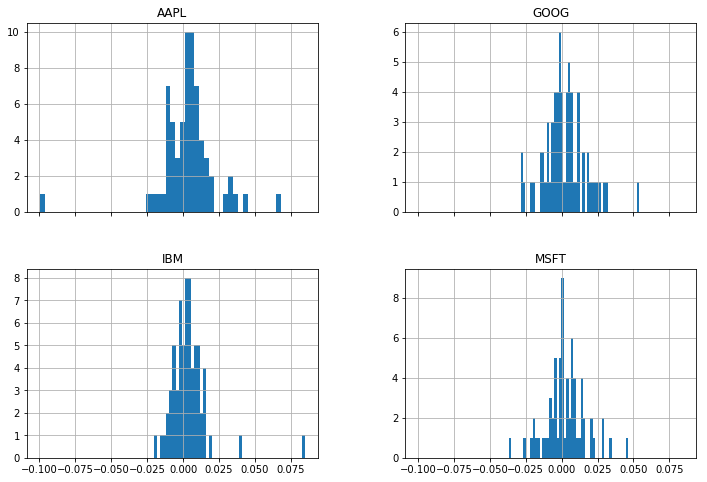

In [26]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Isolate the `Adj Close` values and transform the DataFrame
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

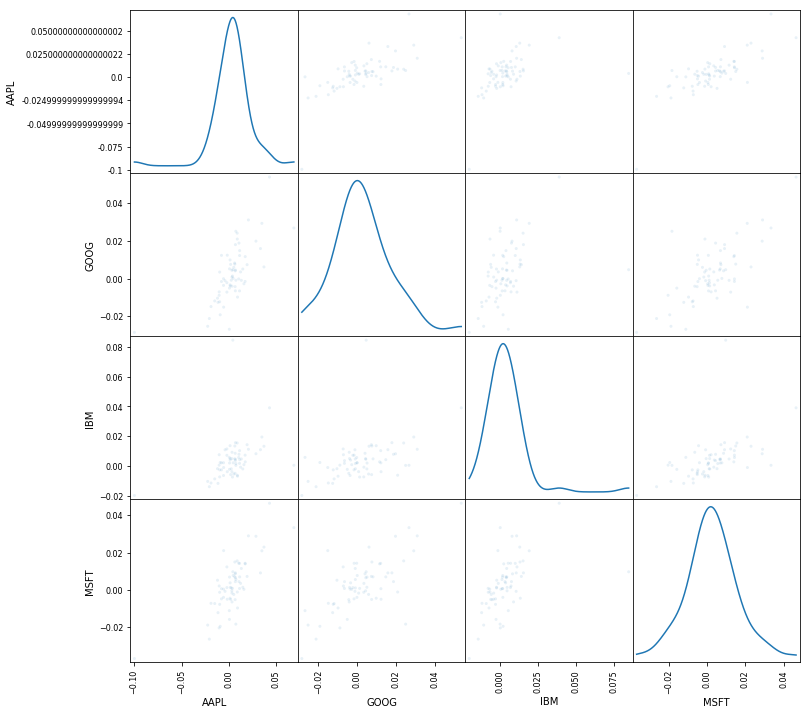

In [32]:
pd.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()